In [1]:
!pip install tensorflow
!pip install tqdm
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.3 MB/s eta 0:00:0000:01


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import csv
import keras
import tensorflow 
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
#from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
      # install the pydicom package
from PIL import Image # install the pillow package and it is called PIL.
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
# train autoencoder for classification with no compression in the bottleneck layer
import keras
from keras import layers

data = pd.read_csv("/notebooks/DCM_File_Paths_Reduced.csv")

size_list_dir = []
finalized_list_dir = []

#Will be used for comparsion to find the ROI dcm files
Label_list = []
#Number of Images
Number_of_Images=[]
Pathology=[]
folder = []
#The counter is used to align the labels and the File Location together
counter = 0;

#print()
#Checker is to test the individual file location and how does it look as a str
checker = ''
data=data.sort_values('DCM_File_Path')
#Select if Mass or Calc
print(data[data['Label'].str.contains("Mass")]) #Checking if it works
data = data[data['Label'].str.contains("Mass")] #Filtered for just Mass
#data = data[data['Label'].str.contains("Calc")] #Can pick calc instead, comment Mass
reduced_file_path =  '/notebooks/reduced_files_3565/'
#Figuring out how to extract data from googledrive
print( reduced_file_path + data['Label'].iloc[0] +"/" + os.listdir(reduced_file_path + data['Label'].iloc[0])[0])


      Unnamed: 0  index                                      DCM_File_Path  \
1871        1871   3962  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
1872        1872   3822  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
1873        1873   3935  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
1874        1874   4372  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
1875        1875   4208  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
...          ...    ...                                                ...   
3560        3560   7000  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3561        3561   5846  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3562        3562   6415  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3563        3563   5406  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3564        3564   5156  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   

      DCM_File_Size                              Label  Number 

In [3]:
    import numpy as np
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape

    import matplotlib.pyplot as plt
    import pandas as pd

    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.models import Model, Sequential
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D, BatchNormalization, LeakyReLU
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
    #from keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.regularizers import l1
    import matplotlib.pyplot as plt

    import pydicom        # install the pydicom package
    from PIL import Image # install the pillow package and it is called PIL.
    from sklearn.model_selection import train_test_split

    from matplotlib import pyplot
    # train autoencoder for classification with no compoutputression in the bottleneck layer
    import keras
    from keras import layers
    # train autoencoder for classification with no compression in the bottleneck layer
    import keras
    from keras import layers
    h = 256
    w = 256
    ch = 1



    #This is the example code that tests out dcms
    #Using the finalized_list_dir I can use my locations
    #This also means of course I can loop them, show the labels of each of them,etc

    trigger = 0
    counter = 0
    dcmMask = np.zeros((len(data),h,w,1), dtype="float")
    y_label = []


    for i in tqdm(range(0,len(data))):
        #Setting up x and y
        dicomdata = pydicom.read_file(reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir(reduced_file_path + data['Label'].iloc[i])[0],force=True)  # masked image
        if data['Classification'].iloc[i]  == 'BENIGN':
            y_label.append(0)
        else:
            y_label.append(1)

        #Testing if labels and dcm align properly
        #if trigger < 5:
        #    print('This is class ',i+20,edited_df['Classification'].iloc[i+20])
        #    print('This is path ', i+20,edited_df['DCM_File_Path'].iloc[i+20])
        #    trigger+=1
        #Converting to numpy array
        tmp = np.zeros((dicomdata.Rows, dicomdata.Columns), dtype="float32")
        tmp = dicomdata.pixel_array/65535.0

        img = Image.fromarray(tmp)
        img_resize = img.resize((h,w), Image.LANCZOS)
        tmp2 = img_to_array(img_resize)
        dcmMask[i] = tmp2.reshape((h,w,ch))
        #Testing if data is set up as a 3d Rensor
        """
        if trigger != 10:
            print('this is dimension',dcmMask[i].ndim)
            print('this is shape',dcmMask[i].shape)
            print('this is type',dcmMask[i].dtype)
            print('this looks like this', dcmMask[i])
            print('this is path:',reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir('/content/drive/MyDrive/reduced_files/' + data['Label'].iloc[i])[0])
            print('this is path classification:',data['Classification'].iloc[i])
            trigger+=1
        """
        #If you are interested to see all the pictures individually,increased runtime
        #data = tmp2.reshape((h,w,ch))
        #plt.imshow(np.reshape(data, (h, w)), cmap='gray')
        #plt.show()
    #print(dcmMask.shape)


  0%|          | 0/1694 [00:00<?, ?it/s]/tmp/ipykernel_32/73259725.py:68: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_resize = img.resize((h,w), Image.LANCZOS)
100%|██████████| 1694/1694 [01:03<00:00, 26.51it/s]


In [ ]:

    from keras.layers import Input, Dense, Conv2D, BatchNormalization, LeakyReLU


    input_img = Input(shape=(h,w,ch))
    encoding_dim = 6

    x = Conv2D(64,(3,3),activation='relu',padding='same')(input_img)
    x = BatchNormalization(name="encoder_norm_1")(x)
    x = LeakyReLU(name="encoder_leakyrelu_1")(x)
    x = MaxPooling2D((2,2),padding='same')(x)

    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="encoder_norm_2")(x)
    x = LeakyReLU(name="encoder_leakyrelu_2")(x)
    x = MaxPooling2D((2,2),padding='same')(x)

    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="encoder_norm_3")(x)
    x = LeakyReLU(name="encoder_leakyrelu_3")(x)
    x = MaxPooling2D((2,2),padding='same')(x)

    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="encoder_norm_4")(x)
    x = LeakyReLU(name="encoder_leakyrelu_4")(x)
    x = MaxPooling2D((2,2),padding='same')(x)

    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="encoder_norm_5")(x)
    x = LeakyReLU(name="encoder_leakyrelu_5")(x)
    x = MaxPooling2D((2,2),padding='same')(x)

    x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="encoder_norm_6")(x)
    x = LeakyReLU(name="encoder_leakyrelu_6")(x)
    x = MaxPooling2D((2,2),padding='same')(x)
    x = Flatten()(x)

    encoded = Dense(42, activation='relu')(x)

    # Decoda
    x = Dense(4*4*8, activation='relu')(encoded)
    x = Reshape((4,4,8))(x)

    x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_1")(x)
    x = LeakyReLU(name="decoder_leakyrelu_1")(x)
    x = UpSampling2D((2,2))(x)

    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_2")(x)
    x = LeakyReLU(name="decoder_leakyrelu_2")(x)
    x = UpSampling2D((2,2))(x)

    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_3")(x)
    x = LeakyReLU(name="decoder_leakyrelu_3")(x)
    x = UpSampling2D((2,2))(x)

    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_4")(x)
    x = LeakyReLU(name="decoder_leakyrelu_4")(x)
    x = UpSampling2D((2,2))(x)

    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_5")(x)
    x = LeakyReLU(name="decoder_leakyrelu_5")(x)
    x = UpSampling2D((2,2))(x)


    x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization(name="decoder_norm_6")(x)
    x = LeakyReLU(name="decoder_leakyrelu_6")(x)
    x = UpSampling2D((2,2))(x)

    decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    autoencoder.compile(optimizer='Adam', loss='mse')

    autoencoder.summary()



Epoch 1/100
27/27 [==============================] - 16s 603ms/step - loss: 0.0014
Epoch 2/100
27/27 [==============================] - 16s 604ms/step - loss: 0.0015
Epoch 3/100
27/27 [==============================] - 16s 603ms/step - loss: 0.0014
Epoch 4/100
27/27 [==============================] - 16s 604ms/step - loss: 0.0013
Epoch 5/100
27/27 [==============================] - 16s 604ms/step - loss: 0.0014
Epoch 6/100
27/27 [==============================] - 16s 603ms/step - loss: 0.0013
Epoch 7/100
27/27 [==============================] - 16s 604ms/step - loss: 0.0014
Epoch 8/100
27/27 [==============================] - 16s 605ms/step - loss: 0.0014
Epoch 9/100
27/27 [==============================] - 16s 605ms/step - loss: 0.0012
Epoch 10/100
27/27 [==============================] - 16s 604ms/step - loss: 0.0013
Epoch 11/100
27/27 [==============================] - 16s 603ms/step - loss: 0.0014
Epoch 12/100
27/27 [==============================] - 16s 604ms/step - loss: 0.0014
E

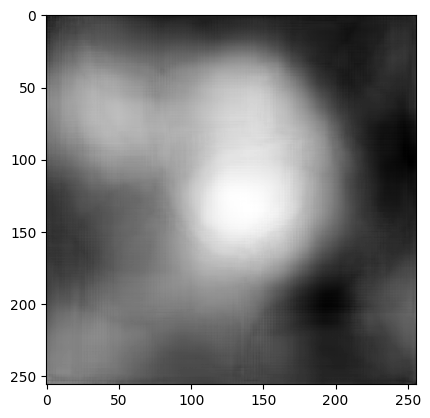

In [87]:



    autoencoder.fit(
    dcmMask,
    dcmMask,
    epochs=100,
    batch_size=64,
    shuffle=True

    )
   # test_loss, test_acc = autoencoder.evaluate(y_train, y_test)
    #print(f"Test accuracy: {test_acc:.3f}")
        ## Generated images
    train_encoded = encoder.predict(dcmMask, verbose=1)
    train_decoded = autoencoder.predict(dcmMask, verbose=1)

    # Check dimesnsions
    print(train_encoded.shape)
    print(train_decoded.shape)



    # Display original image after reshaping
    plt.imshow(dcmMask[0].reshape(256, 256), cmap='gray')



    #Show the generated image by AutoEncoder
    # train_decoded is the output of the decoder,i.e.,regenerated images
    plt.imshow(train_decoded[0].reshape(256, 256), cmap='gray')
     


In [6]:
        from keras.layers import Input, Dense, Conv2D, BatchNormalization, LeakyReLU,Dropout, ReLU,PReLU,ELU
        from keras.regularizers import l2
        from keras.optimizers import Adam


        h = 256
        w = 256
        ch = 1
        input_img = Input(shape=(h,w,ch))
        encoding_dim = 6

        x = Conv2D(64,(3,3),activation='relu',padding='same')(input_img)
        x = BatchNormalization(name="encoder_norm_1")(x)
        x = LeakyReLU()(x)
        
        x = MaxPooling2D((2,2),padding='same')(x)
  

        x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
        x = BatchNormalization(name="encoder_norm_2")(x)
        x = LeakyReLU()(x)

        x = MaxPooling2D((2,2),padding='same')(x)



        x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
        x = BatchNormalization(name="encoder_norm_3")(x)
        x = LeakyReLU()(x)     

        x = MaxPooling2D((2,2),padding='same')(x)

        x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
        x = BatchNormalization(name="encoder_norm_4")(x)
        x = LeakyReLU()(x)
  
        x = MaxPooling2D((2,2),padding='same')(x)

        x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
        x = BatchNormalization(name="encoder_norm_5")(x)
        x = LeakyReLU()(x)

        x = MaxPooling2D((2,2),padding='same')(x)



        x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
        x = BatchNormalization(name="encoder_norm_6")(x)
        x = LeakyReLU()(x)        

        x = MaxPooling2D((2,2),padding='same')(x)
        
        flat = Flatten()(x)
        
        
        encoder_mu  = Dense(64)(flat)


        encoder_log_variance  = Dense(64)(flat)

        encoder_mu_log_variance_model = Model(input_img, (encoder_mu, encoder_log_variance))
        def sampling(mu_log_variance):
            mu, log_variance = mu_log_variance
            epsilon = tensorflow.keras.backend.random_normal(shape=tensorflow.keras.backend.shape(mu), mean=0.0, stddev=1.0)
            random_sample = mu + tensorflow.keras.backend.exp(log_variance/2) * epsilon
            return random_sample

        encoder_output = tensorflow.keras.layers.Lambda(sampling, name="encoder_output")([encoder_mu, encoder_log_variance])

        encoder = tensorflow.keras.models.Model(input_img, encoder_output, name="encoder_model")

        # Decoda
        decoder_input = Input(shape=(64), name="decoder_input")
        decode_input = Dense(128)(decoder_input)

        decode_input = Reshape((4,4,8))(decode_input)

        x = Conv2D(8,(3,3),activation='relu',padding='same')(decode_input)
        x = BatchNormalization(name="decoder_norm_1")(x)

        x = LeakyReLU(name="decoder_ELU_1")(x)
        x = UpSampling2D((2,2))(x)


        x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
        x = BatchNormalization(name="decoder_norm_2")(x)

        x = PReLU(name="decoder_ELU_2")(x)
        x = UpSampling2D((2,2))(x)


        x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
        x = BatchNormalization(name="decoder_norm_3")(x)
        x = LeakyReLU(name="decoder_ELU_3")(x)

        x = UpSampling2D((2,2))(x)

        x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
        x = BatchNormalization(name="decoder_norm_4")(x)
        x = LeakyReLU(name="decoder_ELU_4")(x)

        x = UpSampling2D((2,2))(x)


        x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
        x = BatchNormalization(name="decoder_norm_5")(x)
        x = LeakyReLU(name="decoder_ELU_5")(x)

        x = UpSampling2D((2,2))(x)


        x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
        x = BatchNormalization(name="decoder_norm_6")(x)
        x = LeakyReLU(name="decoder_ELU_6")(x)

        x = UpSampling2D((2,2))(x)

        decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

        decoder = tensorflow.keras.models.Model(decoder_input, decoded, name="decoder_model")


In [7]:
encoder.summary()
decoder.summary()

Model: "encoder_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_26 (Conv2D)             (None, 256, 256, 64  640         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 encoder_norm_1 (BatchNormaliza  (None, 256, 256, 64  256        ['conv2d_26[0][0]']              
 tion)                          )                                                     

In [8]:
#VAE Pieces
vae_input = Input(shape=(h,w,ch))
vae_encoder_output = encoder(vae_input)
vae_decoder_output = decoder(vae_encoder_output)

In [6]:
from tensorflow.keras.losses import binary_crossentropy

In [9]:
import tensorflow as tf

In [10]:

betaAmount = 0.01

#Given Lost Function
def loss_func(encoder_mu, encoder_log_variance,beta=1.0,alpha=1.0):
    def vae_reconstruction_loss(y_true, y_predict):
        reconstruction_loss = tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true - y_predict), axis=[1, 2, 3])
        return reconstruction_loss * 1000

    def vae_kl_loss(encoder_mu, encoder_log_variance, beta):
        kl_loss = -0.5 * tensorflow.keras.backend.sum(1.0 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=1)
        return beta * kl_loss

    def vae_kl_loss_metric(y_true, y_predict):
        kl_loss = -0.5 * tensorflow.keras.backend.sum(1.0 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=1)
        return kl_loss
    def vae_info_loss(encoder_mu, encoder_log_variance, alpha):
        mi_loss = -0.5 * tensorflow.keras.backend.sum(
            tensorflow.keras.backend.log(tensorflow.keras.backend.exp(encoder_log_variance) + 1e-8) - encoder_log_variance,
            axis=1,
        )
        return alpha * mi_loss

    def vae_loss(y_true, y_predict):
        reconstruction_loss = vae_reconstruction_loss(y_true, y_predict)
        kl_loss = vae_kl_loss(y_true, y_predict,beta)
        info_loss = vae_info_loss(y_true, y_predict,alpha)

        loss = reconstruction_loss + kl_loss +info_loss
        return loss

    return vae_loss

In [11]:
vae = tensorflow.keras.models.Model(vae_input, vae_decoder_output, name="VAE")
vae.summary()

Model: "VAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 encoder_model (Functional)  (None, 64)                1145640   
                                                                 
 decoder_model (Functional)  (None, 256, 256, 1)       1154409   
                                                                 
Total params: 2,300,049
Trainable params: 2,296,689
Non-trainable params: 3,360
_________________________________________________________________


In [13]:
from tensorflow.keras.optimizers import  Adam
from  tensorflow.keras.optimizers import  SGD

In [136]:
from keras.callbacks import LearningRateScheduler
initial_lr =0.0013  # Initial learning rate
decay_factor = 0.97  # Factor by which the learning rate is reduced
decay_epochs = 30  # Number of epochs before reducing the learning rate

def lr_scheduler(epoch, lr):
    if epoch % decay_epochs == 0 and epoch > 0:
        return lr * decay_factor
    return lr

# Create the Adam optimizer with the initial learning rate
adam = Adam(learning_rate=initial_lr)
vae.compile(optimizer=Adam(learning_rate=0.001), loss=loss_func(encoder_mu, encoder_log_variance,.451,10.165))
scheduler = LearningRateScheduler(lr_scheduler)

In [13]:
from sklearn.model_selection import train_test_split
train_dcmMask, val_dcmMask = train_test_split(dcmMask, test_size=0.2)  # Adjust test_size as needed

Epoch 1/30
25/25 [==============================] - 14s 566ms/step - loss: 46.4541 - val_loss: 47.1292
Epoch 2/30
25/25 [==============================] - 14s 543ms/step - loss: 46.4464 - val_loss: 46.9613
Epoch 3/30
25/25 [==============================] - 14s 546ms/step - loss: 46.4534 - val_loss: 47.1448
Epoch 4/30
25/25 [==============================] - 14s 545ms/step - loss: 46.4603 - val_loss: 46.8896
Epoch 5/30
25/25 [==============================] - 14s 544ms/step - loss: 46.4506 - val_loss: 47.1777
Epoch 6/30
25/25 [==============================] - 14s 546ms/step - loss: 46.4560 - val_loss: 47.0108
Epoch 7/30
25/25 [==============================] - 14s 545ms/step - loss: 46.4545 - val_loss: 47.1625
Epoch 8/30
25/25 [==============================] - 14s 545ms/step - loss: 46.4631 - val_loss: 47.7253
Epoch 9/30
25/25 [==============================] - 14s 545ms/step - loss: 46.4476 - val_loss: 47.2157
Epoch 10/30
25/25 [==============================] - 14s 544ms/step - los

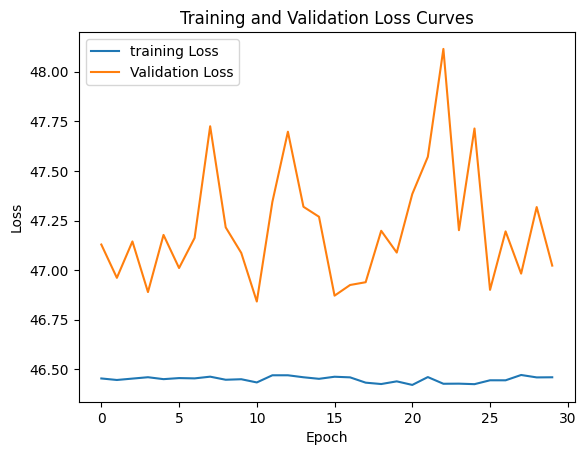

53/53 [==============================] - 5s 94ms/step
(1694, 64)
(1694, 256, 256, 1)


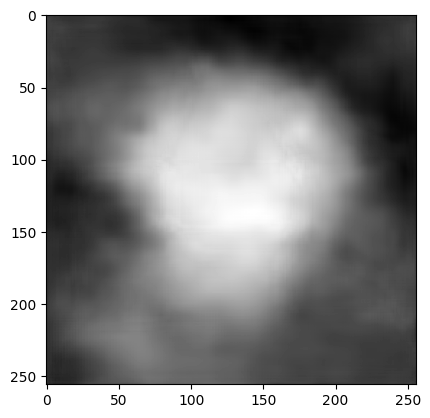

In [163]:

    history = vae.fit(train_dcmMask, train_dcmMask,
                              epochs=30, batch_size=55, validation_data=(val_dcmMask, val_dcmMask),shuffle=True)


    # Plot the loss curves for training and validation
    plt.plot(history.history['loss'], label='training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()
   # test_loss, test_acc = autoencoder.evaluate(y_train, y_test)
    #print(f"Test accuracy: {test_acc:.3f}")
        ## Generated images
    train_encoded = encoder.predict(dcmMask, verbose=1)
    train_decoded = vae.predict(dcmMask, verbose=1)

    # Check dimesnsions
    print(train_encoded.shape)
    
    print(train_decoded.shape)



    # Display original image after reshaping
    plt.imshow(dcmMask[0].reshape(256, 256), cmap='gray')



    #Show the generated image by AutoEncoder
    # train_decoded is the output of the decoder,i.e.,regenerated images
    plt.imshow(train_decoded[0].reshape(256, 256), cmap='gray')

In [171]:
encoder.save('encoder_1.h5')


In [172]:
encoder_mu_log_variance_model.save("encoder_mu_log_variance_model_1.h5")

In [173]:
 encoder_mu_model = tensorflow.keras.models.Model(input_img,encoder_mu)

In [174]:
encoder_mu_model.save('encoder_mu_model_1.h5')

In [175]:
 encoder_log_model = tensorflow.keras.models.Model(input_img,encoder_log_variance)

In [176]:
 encoder_log_model.save("encoder_log_model_1.h5")

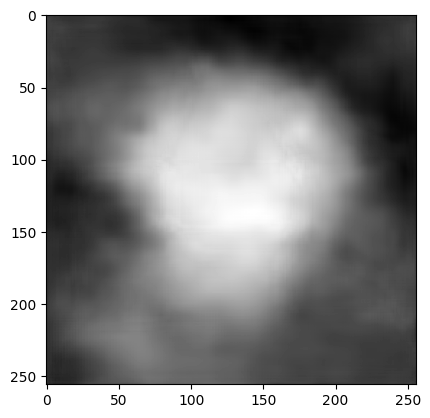

In [164]:
plt.imshow(train_decoded[0].reshape(256, 256), cmap='gray')

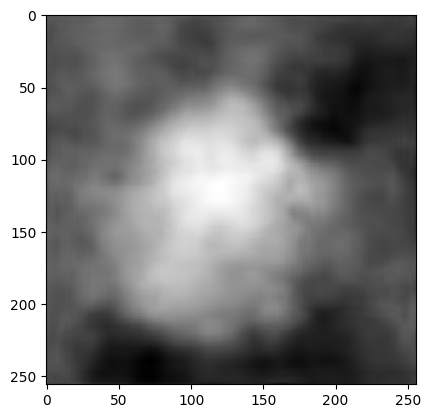

In [165]:
plt.imshow(train_decoded[1].reshape(256, 256), cmap='gray')

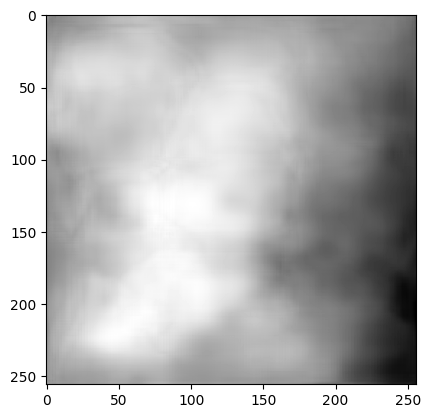

In [166]:
plt.imshow(train_decoded[2].reshape(256, 256), cmap='gray')

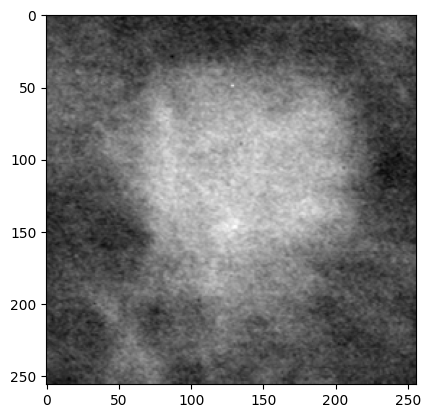

In [167]:
plt.imshow(dcmMask[0].reshape(256, 256), cmap='gray')

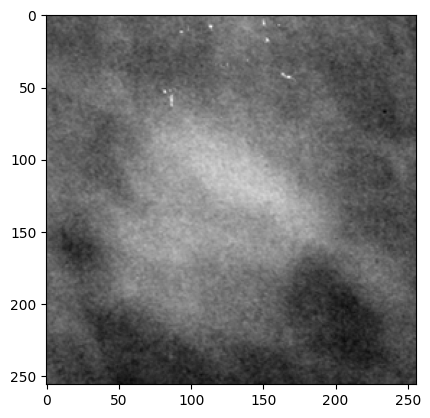

In [159]:
plt.imshow(dcmMask[1].reshape(256, 256), cmap='gray')

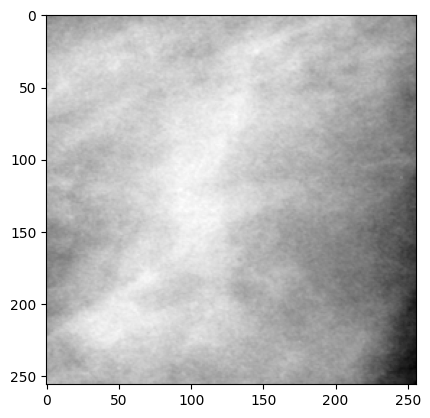

In [160]:
plt.imshow(dcmMask[2].reshape(256, 256), cmap='gray')

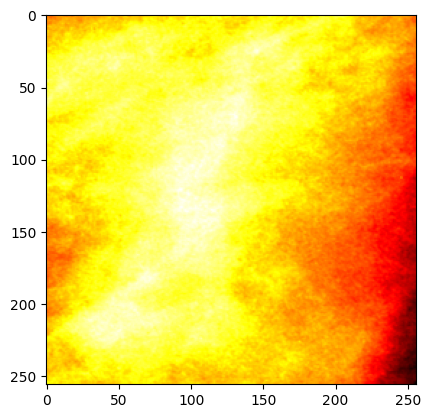

In [161]:
plt.imshow(dcmMask[2].reshape(256, 256,1), cmap='hot')

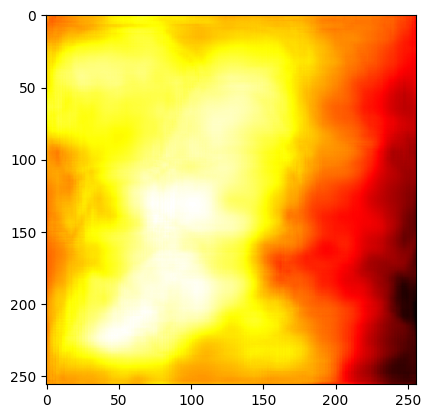

In [168]:
plt.imshow(train_decoded[2].reshape(256, 256,1), cmap='hot')

In [169]:
print(dcmMask[0].reshape(256,256))

[[0.74658173 0.73389018 0.712825   ... 0.71790987 0.72517699 0.71050137]
 [0.71759045 0.71650177 0.71327919 ... 0.71853173 0.72260398 0.71086901]
 [0.72275168 0.72876388 0.72918302 ... 0.71371222 0.70719969 0.70682418]
 ...
 [0.6989544  0.69498962 0.68949527 ... 0.70023131 0.71441579 0.71174866]
 [0.70288223 0.70463681 0.69839257 ... 0.69048434 0.69090819 0.70179039]
 [0.69517821 0.70123005 0.70698643 ... 0.69883132 0.68148893 0.68778455]]


In [170]:
print(train_decoded[0].reshape(256,256))

[[0.69196725 0.69606423 0.6967279  ... 0.6847999  0.69372934 0.6829082 ]
 [0.6978112  0.69895995 0.69921553 ... 0.69248503 0.69377416 0.6966674 ]
 [0.7032683  0.7010177  0.69922125 ... 0.6941731  0.6928874  0.6914898 ]
 ...
 [0.68983126 0.6846577  0.6799128  ... 0.6940653  0.69440645 0.69664794]
 [0.68966967 0.6841564  0.6820705  ... 0.69933176 0.69854516 0.68989474]
 [0.67943513 0.68275654 0.6795541  ... 0.69745374 0.69982415 0.6969277 ]]


In [60]:
train_decoded.shape

(1694, 256, 256, 1)

In [116]:
print(dcmMask[0].reshape(256,256))

[[0.74658173 0.73389018 0.712825   ... 0.71790987 0.72517699 0.71050137]
 [0.71759045 0.71650177 0.71327919 ... 0.71853173 0.72260398 0.71086901]
 [0.72275168 0.72876388 0.72918302 ... 0.71371222 0.70719969 0.70682418]
 ...
 [0.6989544  0.69498962 0.68949527 ... 0.70023131 0.71441579 0.71174866]
 [0.70288223 0.70463681 0.69839257 ... 0.69048434 0.69090819 0.70179039]
 [0.69517821 0.70123005 0.70698643 ... 0.69883132 0.68148893 0.68778455]]


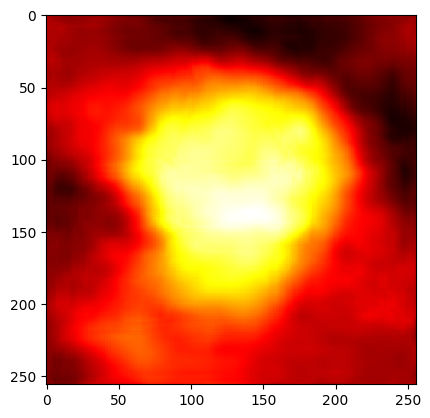

In [177]:
    plt.imshow(train_decoded[0].reshape(256, 256), cmap='hot')

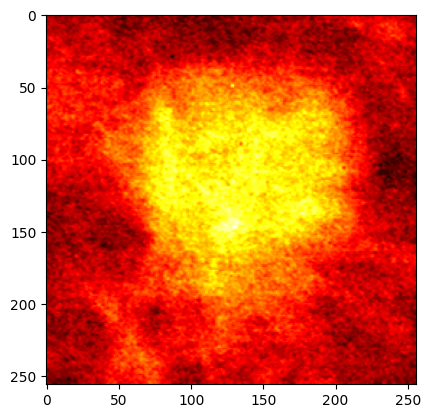

In [178]:
plt.imshow(dcmMask[0].reshape(256, 256,1), cmap='hot')

In [ ]:
print(train_decoded[0].reshape(256, 256))

In [ ]:
files.download('encoder.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [67]:
X_train, X_test, y_train, y_test = train_test_split(dcmMask , y_label, test_size=0.33, random_state=1)

In [77]:
from tensorflow.keras.models import load_model
encoder = load_model('VaeFeatures_700.h5')

In [78]:
X_train_encode = encoder.predict(X_train)

36/36 [==============================] - 2s 39ms/step


In [79]:
X_test_encode = encoder.predict(X_test)

18/18 [==============================] - 1s 39ms/step


In [71]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model



In [80]:
print(X_train_encode.shape)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
print(X_test_encode.shape)

(163, 42)


In [81]:
X_test_encode[1]

array([[-34.46182  , -21.989635 , -36.642036 , ..., -32.62186  ,
        -34.038456 , -36.531086 ],
       [-40.099957 , -33.78609  , -40.969593 , ..., -31.731623 ,
        -42.517326 , -43.53008  ],
       [-32.56674  , -23.894497 , -30.992537 , ..., -33.53166  ,
        -31.57105  , -32.196255 ],
       ...,
       [-18.339987 , -12.962959 , -12.3661785, ..., -19.120695 ,
        -16.25049  , -17.135368 ],
       [-18.189745 , -12.875272 , -12.327782 , ..., -18.971529 ,
        -16.189423 , -17.052765 ],
       [-18.31744  , -12.924664 , -12.358866 , ..., -19.047411 ,
        -16.206938 , -17.121887 ]], dtype=float32)

In [82]:
X_train_encode[1]

array([[-18.32241 , -12.931565, -12.399028, ..., -19.090754, -16.247513,
        -17.143963],
       [-18.352821, -12.956786, -12.372433, ..., -19.12609 , -16.259346,
        -17.175264],
       [-40.100033, -33.785927, -40.96959 , ..., -31.731764, -42.517487,
        -43.530163],
       ...,
       [-19.148983, -13.696022, -13.253845, ..., -19.617085, -16.683002,
        -18.166737],
       [-18.405197, -12.983979, -12.43024 , ..., -19.132114, -16.299541,
        -17.220453],
       [-18.374466, -12.99264 , -12.417607, ..., -19.123854, -16.28789 ,
        -17.203876]], dtype=float32)

In [83]:
dcmMask.shape

(1694, 256, 256, 1)

In [84]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model



rf_classifier = RandomForestClassifier(n_estimators=1000,n_jobs=10, max_depth=10)
rf_classifier.fit(X_train_encode, y_train)

# Evaluate Random Forest
y_pred = rf_classifier.predict(X_test_encode)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [85]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model



a_classifier = AdaBoostClassifier(n_estimators=1000, learning_rate=1.1)
a_classifier.fit(X_train_encode, y_train)

# Evaluate Random Forest
y_pred = a_classifier.predict(X_test_encode)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


ValueError: Found input variables with inconsistent numbers of samples: [2, 1134]

In [86]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model



G_classifier = GradientBoostingClassifier(n_estimators=1000, learning_rate=.01)
G_classifier.fit(X_train_encode, y_train)

# Evaluate Random Forest
y_pred = G_classifier.predict(X_test_encode)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

ValueError: Found array with dim 3. GradientBoostingClassifier expected <= 2.